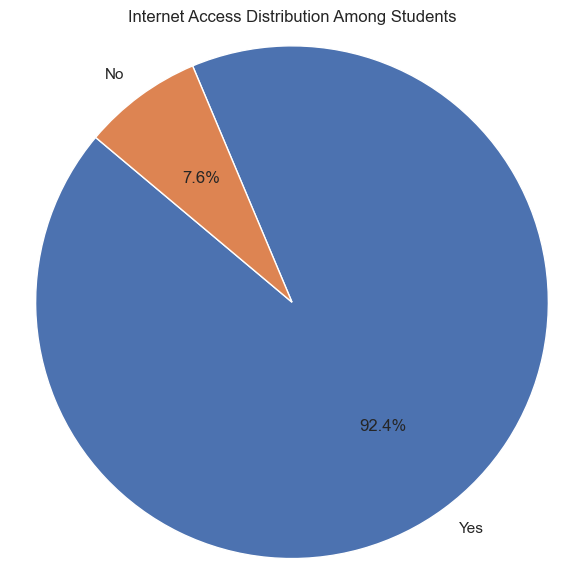

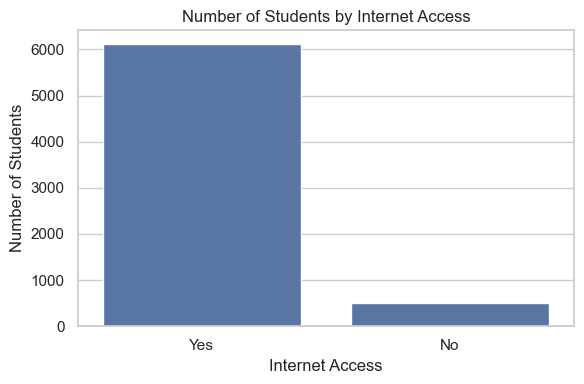

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("StudentPerformanceFactors.csv")  # adjust path if needed

# Set seaborn style
sns.set(style="whitegrid")

# Value counts
internet_access_counts = df['Internet_Access'].value_counts()

# --- Pie Chart ---
plt.figure(figsize=(6, 6))
plt.pie(
    internet_access_counts,
    labels=internet_access_counts.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Internet Access Distribution Among Students')
plt.axis('equal')
plt.tight_layout()
plt.show()

# --- Bar Plot ---
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Internet_Access', order=['Yes', 'No'])
plt.title('Number of Students by Internet Access')
plt.xlabel('Internet Access')
plt.ylabel('Number of Students')
plt.tight_layout()
plt.show()


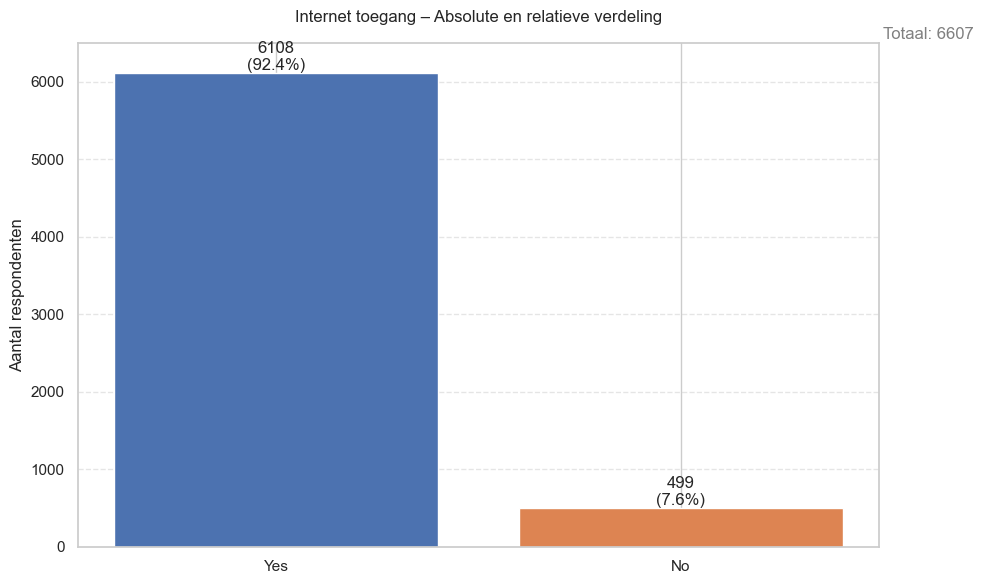

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Data inladen
df = pd.read_csv("StudentPerformanceFactors.csv")

# Waardes tellen
value_counts = df['Internet_Access'].value_counts()
categories = value_counts.index.tolist()     # ['Yes', 'No']
counts = value_counts.values.tolist()        # [6108, 499]
total = sum(counts)
colors = ['#4c72b0', '#dd8452']              # optioneel

# Staafdiagram met annotaties
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=colors)

# Dual annotation: hoogte + percentage
for bar in bars:
    height = bar.get_height()
    percentage = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height}\n({percentage:.1f}%)',
             ha='center', va='bottom', linespacing=1.2)

plt.title('Internet toegang – Absolute en relatieve verdeling', pad=15)
plt.ylabel('Aantal respondenten')
plt.ylim(0, 6500)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Referentielijn totaal
plt.axhline(y=total, color='gray', linestyle=':', alpha=0.5)
plt.text(1.5, total, f'Totaal: {total}', va='center', ha='left', color='gray')

plt.tight_layout()
plt.show()


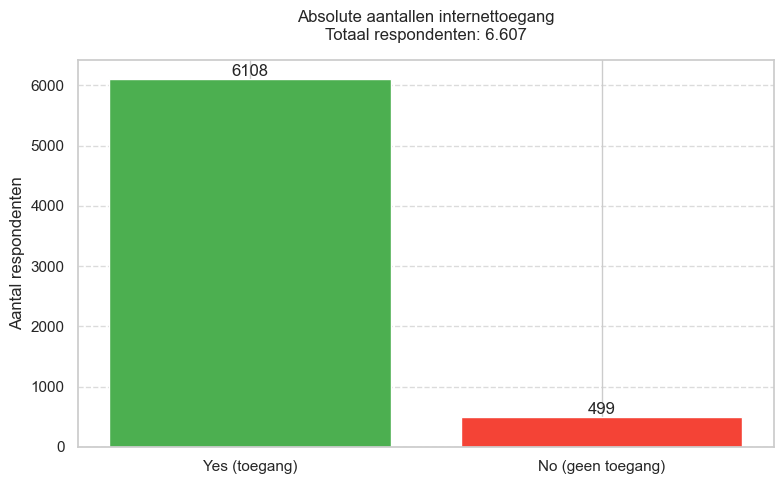

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Yes (toegang)', 'No (geen toegang)']
counts = [6108, 499]
colors = ['#4CAF50', '#F44336']  # Groen en rood

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, counts, color=colors)

# Aantallen boven de staven
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.title('Absolute aantallen internettoegang\nTotaal respondenten: 6.607', pad=15)
plt.ylabel('Aantal respondenten')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

   Gaming  Attendance  Preparation
0     0.5         NaN          4.0
1     0.5         NaN          0.5
2     4.0         NaN          0.5
3     4.0         NaN          4.0
4     2.5         NaN          0.5


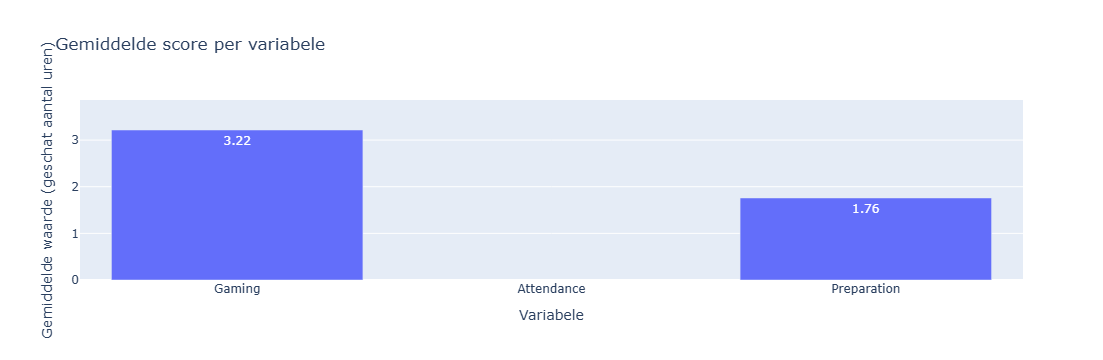

In [10]:
import pandas as pd
import plotly.graph_objects as go

# 1. Laad de dataset
df = pd.read_csv("ResearchInformation3.csv")
df.columns = df.columns.str.strip()  # Verwijder spaties

# 2. Mapping van tekst naar getallen
category_map = {
    '0-1 Hour': 0.5,
    '2-3 Hours': 2.5,
    'More than 3 Hours': 4
}

# 3. Converteer kolommen naar numeriek
for col in ['Gaming', 'Attendance', 'Preparation']:
    df[col] = df[col].map(category_map)

# 4. Controleer of alles goed is gegaan
print(df[['Gaming', 'Attendance', 'Preparation']].head())

# 5. Bereken gemiddelden
avg_gaming = df['Gaming'].mean()
avg_attendance = df['Attendance'].mean()
avg_preparation = df['Preparation'].mean()

# 6. Plot
fig = go.Figure(
    go.Bar(
        x=['Gaming', 'Attendance', 'Preparation'],
        y=[avg_gaming, avg_attendance, avg_preparation],
        text=[f"{avg_gaming:.2f}", f"{avg_attendance:.2f}", f"{avg_preparation:.2f}"],
        textposition='auto'
    )
)

fig.update_layout(
    title="Gemiddelde score per variabele",
    xaxis_title="Variabele",
    yaxis_title="Gemiddelde waarde (geschat aantal uren)",
    yaxis=dict(range=[0, max(avg_gaming, avg_attendance, avg_preparation) * 1.2])
)

fig.show()


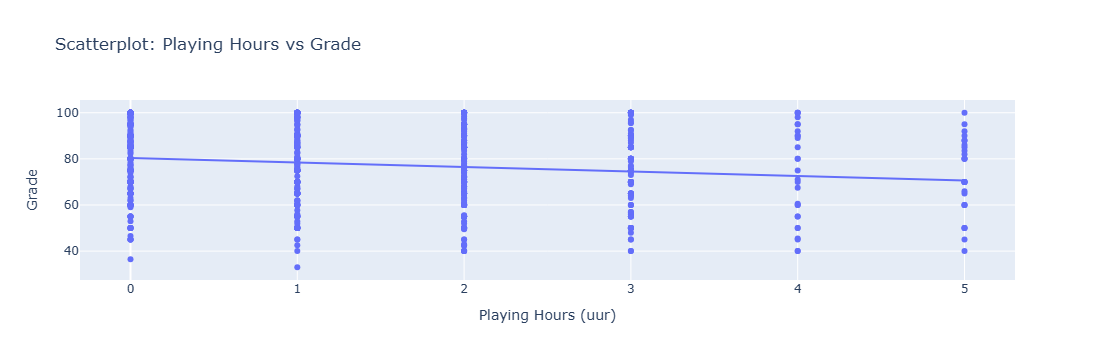

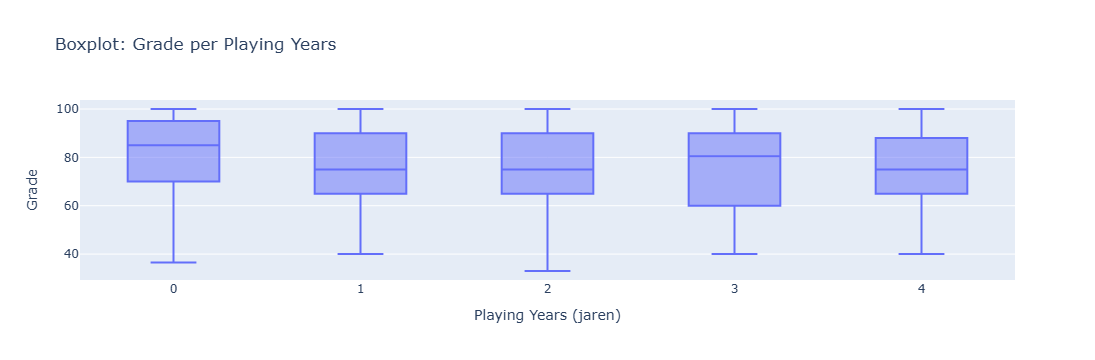

In [9]:
import pandas as pd
import plotly.express as px

# 1. Lees de data in
df = pd.read_csv("gameandgrade.csv")
df.columns = df.columns.str.strip()  # verwijder witruimte in kolomnamen

# 2. Converteer kolommen naar numeriek
for col in ['Playing Hours', 'Playing Years', 'Grade']:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # ongeldige waarden worden NaN

# 3. Verwijder rijen met ontbrekende of ongeldige waarden
df = df.dropna(subset=['Playing Hours', 'Playing Years', 'Grade'])

# === Scatterplot: Playing Hours vs Grade ===
fig_scatter = px.scatter(
    df,
    x='Playing Hours',
    y='Grade',
    title='Scatterplot: Playing Hours vs Grade',
    labels={'Playing Hours': 'Playing Hours (uur)', 'Grade': 'Grade'},
    trendline='ols'
)
fig_scatter.show()

# === Boxplot: Grade per Playing Years ===
fig_box = px.box(
    df,
    x='Playing Years',
    y='Grade',
    title='Boxplot: Grade per Playing Years',
    labels={'Playing Years': 'Playing Years (jaren)', 'Grade': 'Grade'}
)
fig_box.show()
